In [1]:
import pandas as pd
file_mit_test = 'mitbih_test.csv'
file_mit_train = 'mitbih_train.csv'
file_ptbdb_ab = 'ptbdb_abnormal.csv'
file_ptbdb_no = 'ptbdb_normal.csv'

df_mit_test = pd.read_csv(file_mit_test, header=None)
df_mit_train = pd.read_csv(file_mit_train, header=None)
df_ptbdb_ab = pd.read_csv(file_ptbdb_ab, header=None)
df_ptbdb_no = pd.read_csv(file_ptbdb_no, header=None)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X_train = df_mit_train.iloc[:,:-1]
X_test = df_mit_test.iloc[:,:-1]
Y_train_1 = df_mit_train.iloc[:,-1]
Y_test_1 = df_mit_test.iloc[:,-1]
n_rows_train = X_train.shape[0]
n_rows_test = X_test.shape[0]
n_cols = np.max(Y_train_1)+1

In [16]:
# change Y to  vectors
Y_train = np.zeros((int(n_rows_train),int(n_cols)),dtype = float)
# print(Y_train[:5,:])
Y_test = np.zeros((int(n_rows_test),int(n_cols)),dtype = float)
# print(Y_test[:5,:])

for counter,value in enumerate(Y_train_1):
    Y_train[counter, int(value)] = 1.0
    
for counter,value in enumerate(Y_test_1):
    Y_test[counter, int(value)] = 1.0

Accuracy on training set: 1.000
Accuracy on test set: 0.953


ValueError: x and y must be the same size

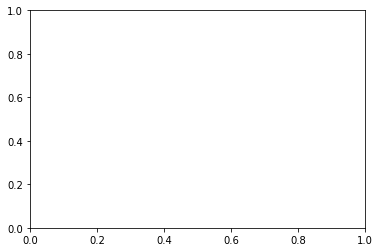

In [18]:
# (1) decision trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,Y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, Y_test)))
# Accuracy on test set: 0.953

In [5]:
# (1) k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,Y_train)
print('k-nearest neighbors score:', clf.score(X_test, Y_test))
# k-nearest neighbors score: 0.9622693221268043 

k-nearest neighbors score: 0.9622693221268043


In [6]:
# (2) K-neighbors regression
from sklearn.neighbors import KNeighborsRegressor
Kreg = KNeighborsRegressor(n_neighbors=3)
Kreg.fit(X_train,Y_train)
print('K-neighbors regression score:', Kreg.score(X_test,Y_test))
# K-neighbors regression score: 0.8682967396731396

K-neighbors regression score: 0.8682967396731396


In [7]:
tree1 = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree1.fit(X_train,Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))
# Accuracy on test set: 0.896

Accuracy on training set: 0.894
Accuracy on test set: 0.896


In [8]:
# (8) Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=2, random_state=5)
forest.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))
# Accuracy on test set: 0.915

Accuracy on training set: 0.965
Accuracy on test set: 0.915


In [9]:
forest1 = RandomForestClassifier(n_estimators=10, random_state=5)
forest1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest1.score(X_test, Y_test)))
#Accuracy on test set: 0.966

Accuracy on training set: 0.996
Accuracy on test set: 0.966


In [10]:
#(10) Neural Networks
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, Y_test)))
#Accuracy on test set: 0.963

Accuracy on training set: 0.969
Accuracy on test set: 0.963


In [11]:
# one hidden layer
mlp1 = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10]).fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(mlp1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp1.score(X_test, Y_test)))
#Accuracy on test set: 0.931

Accuracy on training set: 0.935
Accuracy on test set: 0.931


In [12]:
# two hidden layers
mlp2 = MLPClassifier(solver='lbfgs', random_state=0,hidden_layer_sizes=[10,10]).fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(mlp2.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp2.score(X_test, Y_test)))
#Accuracy on test set: 0.932

Accuracy on training set: 0.936
Accuracy on test set: 0.932


In [13]:
# two hidden layers with tanh nonlinearity
mlp2tanh = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0,hidden_layer_sizes=[10,10]).fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(mlp2tanh.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp2tanh.score(X_test, Y_test)))
#Accuracy on test set: 0.938

Accuracy on training set: 0.940
Accuracy on test set: 0.938


In [14]:
# maximum iteration is 1000
mlp1000 = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp1000.fit(X_train,Y_train)
print("Accuracy on training set: {:.3f}".format(mlp1000.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(mlp1000.score(X_test, Y_test)))
#Accuracy on test set: 0.919

Accuracy on training set: 0.921
Accuracy on test set: 0.919
